In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [4]:
df= pd.read_csv("/content/drive/MyDrive/Bondora_raw.csv")

In [5]:
df.shape

(134529, 112)

In [6]:
df['Status'].value_counts()

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

In [7]:
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,2009-06-11 16:40:39,2009-06-16,2010-07-06,2009-07-27,2010-06-25,2010-06-25,17,5,2.0,1,61,1947-11-26,1.0,EE,319.5582,115.0408,30.0,12,NaN,HARJU,TALLINN,7,3.0,1.0,0,3.0,UpTo3Years,klienditeenindaja,MoreThan25Years,7.0,NaN,6000.0,0.0,0.0,0.0,0.0,0.0,4500.0,10500.0,0,0.0,0,0.0,0.0,25,True,1800.0000,319.0800,2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,91-120,NaN,NaN,NaN,NaN,115.0408,20.4222,0.0,0.0,0.00,0.00,1,83.0852,0.0000,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,2009-06-10 15:48:57,2009-06-15,2009-07-07,2009-07-15,2009-07-15,2009-07-15,20,4,2.0,1,48,1960-11-05,1.0,EE,191.7349,140.6057,25.0,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,0,3.0,MoreThan5Years,Õppealajuhataja lasteaias,MoreThan25Years,16.0,NaN,8300.0,0.0,0.0,0.0,0.0,0.0,2500.0,10800.0,0,0.0,0,0.0,0.0,15,True,2200.0000,45.8300,2009-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,NaN,NaN,NaN,140.6057,2.0227,0.0,0.0,0.00,0.00,2,255.6467,258.6256,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,2009-06-05 19:12:29,2009-06-15,NaN,2009-07-27,2011-02-25,2014-05-13,20,6,2.0,1,58,1950-11-13,1.0,EE,319.5582,319.5409,25.0,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,0,3.0,UpTo4Years,teenindaja,MoreThan25Years,9.0,NaN,5000.0,0.0,0.0,0.0,0.0,0.0,2000.0,7000.0,0,0.0,0,0.0,0.0,25,True,319.5409,197.2926,2012-10-01,2813.0,2012-05-14,2935.0,2012-01-13,NaN,NaN,NaN,NaN,2012-07-16,116.35,236.97,38.24,279.5049,270.7323,163.1549,50.99,NaN,2016-03-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late,True,180+,180+,NaN,NaN,NaN,NaN,203.1909,59.7626,0.0,0.0,116.35,414.07,0,0.0000,

In [8]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = df.isnull().sum().sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

24.374988717249494


In [9]:
DropColList = df.columns[(df.isnull().mean()*100) >= 40].tolist()


In [10]:
len(df.columns[(df.isnull().mean()*100) >= 40])

36

In [11]:
df.drop(columns= DropColList, axis= 1, inplace=True)

In [12]:
df.shape

(134529, 76)

In [13]:
df.drop(columns=['LoanId', 'LoanNumber', 'UserName', 'DateOfBirth', 'County', 'City'], inplace = True)

In [14]:
df.drop(columns=['IncomeFromPrincipalEmployer', 'IncomeFromPension', 'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
                 'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther'], inplace = True)

In [15]:
df.drop(columns=['ReportAsOfEOD', 'ListedOnUTC', 'BiddingStartedOn', 'LoanApplicationStartedDate', 'LastPaymentOn',
                 'MonthlyPaymentDay','LoanDate', 'FirstPaymentDate', 'MaturityDate_Original','MaturityDate_Last'], 
        inplace = True)

In [16]:
df.drop(columns=['NextPaymentNr', 'NrOfScheduledPayments', 'ApplicationSignedHour', 'ApplicationSignedWeekday', 
                 'ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate', 'ExpectedLoss','LossGivenDefault',
                'ExpectedReturn', 'ProbabilityOfDefault', 'PrincipalOverdueBySchedule', 'StageActiveSince', 
                'ModelVersion', 'WorseLateCategory'], inplace = True)

In [17]:
df.shape

(134529, 39)

In [18]:
df.columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'VerificationType', 'LanguageCode', 'Age', 'Gender', 'Country',
       'AppliedAmount', 'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment',
       'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'Rating', 'Status', 'Restructured', 'CreditScoreEsMicroL',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan'],
      dtype='object')

# **Deriving Target Variable 'LoanStatus'**

In [19]:
# Add DefaultDate Column to our df dataset
df["DefaultDate"] = pd.read_csv("/content/drive/MyDrive/Bondora_raw.csv",low_memory=False).DefaultDate

In [20]:
# let's find the counts of each status categories 
df.Status.value_counts()

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

In [21]:
# filtering out Current Status records
df = df[df.Status != 'Current']

In [22]:
df.Status.value_counts()

Late      45772
Repaid    31622
Name: Status, dtype: int64

In [23]:
df.shape

(77394, 40)

In [24]:
# Rplace any null value by NoDefault in DefaultDate column
df.DefaultDate.fillna('NotDefault', inplace = True)

In [25]:
# Replace any Date by Defalut
for i in range(len(df.DefaultDate.values)):
    if df.DefaultDate.values[i] != 'NotDefault': df.DefaultDate.values[i] = 'Default'

# check the counts of default and nondefault 
df.DefaultDate.value_counts()    

Default       42794
NotDefault    34600
Name: DefaultDate, dtype: int64

In [26]:
# let's drop the status columns
df.drop(columns=['Status'], inplace = True)

In [27]:
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,DefaultDate
0,0,0,115.0410,True,2.0,1,61,1.0,EE,319.5582,115.0408,30.0,12,NaN,7,3.0,1.0,3.0,UpTo3Years,7.0,NaN,10500.0,0,0.0,0,0.0,0.0,NaN,False,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,NotDefault
1,0,0,140.6057,False,2.0,1,48,1.0,EE,191.7349,140.6057,25.0,1,NaN,7,5.0,4.0,3.0,MoreThan5Years,16.0,NaN,10800.0,0,0.0,0,0.0,0.0,NaN,False,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,NotDefault
2,0,0,319.5580,True,2.0,1,58,1.0,EE,319.5582,319.5409,25.0,20,NaN,2,4.0,1.0,3.0,UpTo4Years,9.0,NaN,7000.0,0,0.0,0,0.0,0.0,NaN,True,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,Default
3,0,0,57.5205,True,2.0,1,23,1.0,EE,127.8233,57.5205,45.0,15,NaN,0,2.0,3.0,NaN,UpTo2Years,1.0,NaN,11600.0,0,0.0,0,0.0,0.0,NaN,False,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,NotDefault
4,0,0,319.5582,True,2.0,1,25,1.0,EE,319.5582,319.5436,30.0,12,NaN,6,4.0,2.0,3.0,UpTo2Years,7.0,NaN,6800.0,0,0.0,0,0.0,0.0,NaN,False,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,Default


In [28]:
# Rename DefaultDate column to LoanStatus
df.rename(columns={'DefaultDate':'LoanStatus'}, inplace = True)

In [29]:
df.LoanStatus.value_counts()

Default       42794
NotDefault    34600
Name: LoanStatus, dtype: int64

In [30]:
# write your code here
df.dtypes

BidsPortfolioManager                        int64
BidsApi                                     int64
BidsManual                                float64
NewCreditCustomer                            bool
VerificationType                          float64
LanguageCode                                int64
Age                                         int64
Gender                                    float64
Country                                    object
AppliedAmount                             float64
Amount                                    float64
Interest                                  float64
LoanDuration                                int64
MonthlyPayment                            float64
UseOfLoan                                   int64
Education                                 float64
MaritalStatus                             float64
EmploymentStatus                          float64
EmploymentDurationCurrentEmployer          object
OccupationArea                            float64


# **Calculating LoanTenure**

In [31]:
# Load raw data
raw_data = pd.read_csv('/content/drive/MyDrive/Bondora_raw.csv')

# Filter the for Status = Repaid or Late
raw_data = raw_data[raw_data['Status'].isin(['Repaid', 'Late'])]

# Choose only needed columns to calculate loan tenure
raw_data = raw_data[['MaturityDate_Original', 'LoanDate']]

In [32]:
# Convert date columns into datetime objects
for col in raw_data.columns.values:
    raw_data[col] = pd.to_datetime(raw_data[col])

# Calculate LoanTenure
raw_data['LoanTenure'] = ((raw_data['MaturityDate_Original'].dt.year - raw_data['LoanDate'].dt.year)*12 +\
     (raw_data['MaturityDate_Original'].dt.month - raw_data['LoanDate'].dt.month))

# Set that column in loan_data
df['LoanTenure'] = raw_data['LoanTenure'].values

# Drop LoanDuration as it has errors
df = df.drop('LoanDuration', axis=1)

In [33]:
# Replace Null values by 'Not Set'
df.VerificationType.fillna('Not Set', inplace = True)

In [34]:
# convert from float type to string first
df['VerificationType'] = df['VerificationType'].astype(object)

for i in range(len(df.VerificationType.values)):
    df.VerificationType.values[i] = str(df.VerificationType.values[i])

In [35]:
df.VerificationType.dtype, type(df.VerificationType.values[0])

(dtype('O'), str)

In [36]:
# From Bondora dataser we can find that:
# 0 Not set, 1 Income unverified, 2 Income unverified, cross-referenced by phone, 3 Income verified 
df.VerificationType = df.VerificationType.str.replace('0.0', 'Not Set')
df.VerificationType = df.VerificationType.str.replace('1.0', 'Income unverified')
df.VerificationType = df.VerificationType.str.replace('2.0', 'Income unverified,cross-referenced by phone')
df.VerificationType = df.VerificationType.str.replace('3.0', 'Income verified')
df.VerificationType = df.VerificationType.str.replace('4.0', 'Income and expenses verified')

In [37]:
df.VerificationType.value_counts()

Income and expenses verified                   41428
Income unverified                              25626
Income verified                                 8460
Income unverified,cross-referenced by phone     1827
Not Set                                           53
Name: VerificationType, dtype: int64

In [38]:
df.Gender.value_counts()

0.0    50697
1.0    20927
2.0     5725
Name: Gender, dtype: int64

In [39]:
# Replace Null values by Undefined
df.Gender.fillna('Undefined', inplace = True)

In [40]:
# Convert from int types to string first
df['Gender'] = df['Gender'].astype(object)

for i in range(len(df.Gender.values)):
    df.Gender.values[i] = str(df.Gender.values[i])

In [41]:
df.Gender.dtype, type(df.Gender.values[0])

(dtype('O'), str)

In [42]:
# From Bonora dataser we can find that:
## 0.0 Male 1.0 Female 2.0 Undefined
df.Gender = df.Gender.str.replace('0.0', 'Male')
df.Gender = df.Gender.str.replace('1.0', 'Female')
df.Gender = df.Gender.str.replace('2.0', 'Undefined')

In [43]:
# Check
df.Gender.value_counts()

Male         50697
Female       20927
Undefined     5770
Name: Gender, dtype: int64

In [44]:
df.LanguageCode.value_counts()

1     33239
4     20302
6     16407
3      6534
2       603
9       293
22        6
5         5
15        1
10        1
13        1
7         1
21        1
Name: LanguageCode, dtype: int64

In [45]:
# Convert from int types to string first
df.LanguageCode = df.LanguageCode.astype(object)

for i in range(len(df.LanguageCode.values)):
    df.LanguageCode.values[i] = str(df.LanguageCode.values[i])

In [46]:
df.LanguageCode.dtype, type(df.LanguageCode.values[0])

(dtype('O'), str)

In [47]:
df.LanguageCode.value_counts()

1     33239
4     20302
6     16407
3      6534
2       603
9       293
22        6
5         5
15        1
10        1
13        1
7         1
21        1
Name: LanguageCode, dtype: int64

In [48]:
# From Bonora dataser we can find that:
## 1 Estonian 2 English 3 Russian 4 Finnish 5 German 6 Spanish 9 Slovakian
### We will give 'Other' to other Language code
#### You should handle 'Other' first
df.LanguageCode = df.LanguageCode.str.replace('7',  'Other')
df.LanguageCode = df.LanguageCode.str.replace('10', 'Other')
df.LanguageCode = df.LanguageCode.str.replace('13', 'Other')
df.LanguageCode = df.LanguageCode.str.replace('15', 'Other')
df.LanguageCode = df.LanguageCode.str.replace('21', 'Other')
df.LanguageCode = df.LanguageCode.str.replace('22', 'Other')
df.LanguageCode = df.LanguageCode.str.replace('1', 'Estonian')
df.LanguageCode = df.LanguageCode.str.replace('2', 'English')
df.LanguageCode = df.LanguageCode.str.replace('3', 'Russian')
df.LanguageCode = df.LanguageCode.str.replace('4', 'Finnish')
df.LanguageCode = df.LanguageCode.str.replace('5', 'German')
df.LanguageCode = df.LanguageCode.str.replace('6', 'Spanish')
df.LanguageCode = df.LanguageCode.str.replace('9', 'Slovakian')

In [49]:
# Check
df.LanguageCode.value_counts()

Estonian     33239
Finnish      20302
Spanish      16407
Russian       6534
English        603
Slovakian      293
Other           11
German           5
Name: LanguageCode, dtype: int64

In [50]:
df.UseOfLoan.value_counts()

-1      44177
 7       8926
 2       8102
 0       6419
 6       2884
 3       1743
 5       1621
 8       1367
 4       1259
 1        843
 102       21
 110       17
 104        6
 101        5
 107        2
 108        1
 106        1
Name: UseOfLoan, dtype: int64

In [51]:
# Convert from int types to string first
df.UseOfLoan = df.UseOfLoan.astype(object)

for i in range(len(df.UseOfLoan.values)):
    df.UseOfLoan.values[i] = str(df.UseOfLoan.values[i])

In [52]:
df.UseOfLoan.dtype, type(df.UseOfLoan.values[0])

(dtype('O'), str)

In [53]:
# From Bondora dataset and Bondora Statistics Page we can find that:
## -1 Not Set, 0 Loan consolidation , 1 Real estate, 2 Home improvement, 3 Business, 4 Education, 5 Travel, 6 Vehicle, 7 Other,
## 8 Health, 102  Purchase of machinery equipment, 110 Other business, 104 Accounts receivable financing, 
## 101 Working capital financing, 107 Acquisition of stocks, 108 Acquisition of real estate, 106 Acquisition of means of transport

df.UseOfLoan = df.UseOfLoan.str.replace('102', 'Purchase of machinery equipment')
df.UseOfLoan = df.UseOfLoan.str.replace('110', 'Other business')
df.UseOfLoan = df.UseOfLoan.str.replace('104', 'Accounts receivable financing')
df.UseOfLoan = df.UseOfLoan.str.replace('101', 'Working capital financing')
df.UseOfLoan = df.UseOfLoan.str.replace('107', 'Acquisition of stocks')
df.UseOfLoan = df.UseOfLoan.str.replace('106', 'Acquisition of means of transport')
df.UseOfLoan = df.UseOfLoan.str.replace('108', 'Acquisition of real estate')

df.UseOfLoan = df.UseOfLoan.str.replace('-1',  'Not Set')
df.UseOfLoan = df.UseOfLoan.str.replace('0',   'Loan consolidation')
df.UseOfLoan = df.UseOfLoan.str.replace('1',   'Real estate')
df.UseOfLoan = df.UseOfLoan.str.replace('2',   'Home improvement')
df.UseOfLoan = df.UseOfLoan.str.replace('3',   'Business')
df.UseOfLoan = df.UseOfLoan.str.replace('4',   'Education')
df.UseOfLoan = df.UseOfLoan.str.replace('5',   'Travel')
df.UseOfLoan = df.UseOfLoan.str.replace('6',   'Vehicle')
df.UseOfLoan = df.UseOfLoan.str.replace('7',   'Other')
df.UseOfLoan = df.UseOfLoan.str.replace('8',   'Health')

In [54]:
# Check
df.UseOfLoan.value_counts()

Not Set                              44177
Other                                 8926
Home improvement                      8102
Loan consolidation                    6419
Vehicle                               2884
Business                              1743
Travel                                1621
Health                                1367
Education                             1259
Real estate                            843
Purchase of machinery equipment         21
Other business                          17
Accounts receivable financing            6
Working capital financing                5
Acquisition of stocks                    2
Acquisition of real estate               1
Acquisition of means of transport        1
Name: UseOfLoan, dtype: int64

In [55]:
# We will replace Null values
df.Education.fillna('Not Present', inplace = True)

In [56]:
df.Education.value_counts()

4.0            28557
5.0            20919
3.0            17257
2.0             5379
1.0             5226
Not Present       45
0.0                8
-1.0               3
Name: Education, dtype: int64

In [57]:
# Convert from int types to string first
df.Education = df.Education.astype(object)

for i in range(len(df.Education.values)):
    df.Education.values[i] = str(df.Education.values[i])

In [58]:
# We will replace 0 and -1 by "Not Present".
## And from Bondora dataset and Bondora Statistics Page we can find that:
## 1 Primary education, 2 Basic education, 3 Vocational education, 4 Secondary education, 5 Higher education.
df.Education = df.Education.str.replace('-1.0',  'Not Present')
df.Education = df.Education.str.replace('0.0',   'Not Present')
df.Education = df.Education.str.replace('1.0',   'Primary education')
df.Education = df.Education.str.replace('2.0',   'Basic education')
df.Education = df.Education.str.replace('3.0',   'Vocational education')
df.Education = df.Education.str.replace('4.0',   'Secondary education')
df.Education = df.Education.str.replace('5.0',   'Higher education')

In [59]:
# Check
df.Education.value_counts()

Secondary education     28557
Higher education        20919
Vocational education    17257
Basic education          5379
Primary education        5226
Not Present                56
Name: Education, dtype: int64

In [60]:
df.MaritalStatus.value_counts()

-1.0    44177
 3.0    11504
 1.0     9585
 2.0     8479
 4.0     3077
 5.0      519
 0.0        8
Name: MaritalStatus, dtype: int64

In [61]:
# Replace Null values by "Not Specified"
df.MaritalStatus.fillna('Not Specified', inplace = True)

In [62]:
# Convert from int types to string first
df.MaritalStatus = df.MaritalStatus.astype(object)

for i in range(len(df.MaritalStatus.values)):
    df.MaritalStatus.values[i] = str(df.MaritalStatus.values[i])

In [63]:
# Again Marital status of value 0 and -1 has no description so we will encode them as Not_specified
## And from Bondora dataser:
## 1 Married 2 Cohabitant 3 Single 4 Divorced 5 Widow
df.MaritalStatus = df.MaritalStatus.str.replace('-1.0',  'Not Specified')
df.MaritalStatus = df.MaritalStatus.str.replace('0.0',   'Not Specified')
df.MaritalStatus = df.MaritalStatus.str.replace('1.0',   'Married')
df.MaritalStatus = df.MaritalStatus.str.replace('2.0',   'Cohabitant')
df.MaritalStatus = df.MaritalStatus.str.replace('3.0',   'Single')
df.MaritalStatus = df.MaritalStatus.str.replace('4.0',   'Divorced')
df.MaritalStatus = df.MaritalStatus.str.replace('5.0',   'Widow')

In [64]:
# Check 
df.MaritalStatus.value_counts()

Not Specified    44230
Single           11504
Married           9585
Cohabitant        8479
Divorced          3077
Widow              519
Name: MaritalStatus, dtype: int64

In [65]:
df.EmploymentStatus.value_counts()

-1.0    44177
 3.0    27309
 5.0     1695
 6.0     1663
 4.0     1211
 2.0     1110
 0.0       32
Name: EmploymentStatus, dtype: int64

In [66]:
df.EmploymentStatus.fillna('Not present', inplace = True)

In [67]:
# Convert from int types to string first
df.EmploymentStatus = df.EmploymentStatus.astype(object)

for i in range(len(df.EmploymentStatus.values)):
    df.EmploymentStatus.values[i] = str(df.EmploymentStatus.values[i])

In [68]:
# Again EmploymentStatus of value 0 and -1 has no description so we will encode them as Not present
## And from Bondora dataser:
## 1 Unemployed 2 Partially employed 3 Fully employed 4 Self-employed 5 Entrepreneur 6 Retiree
df.EmploymentStatus = df.EmploymentStatus.str.replace('-1.0',  'Not present')
df.EmploymentStatus = df.EmploymentStatus.str.replace('0.0',   'Not present')
df.EmploymentStatus = df.EmploymentStatus.str.replace('2.0',   'Partially employed')
df.EmploymentStatus = df.EmploymentStatus.str.replace('3.0',   'Fully employed')
df.EmploymentStatus = df.EmploymentStatus.str.replace('4.0',   'Self-employed')
df.EmploymentStatus = df.EmploymentStatus.str.replace('5.0',   'Entrepreneur')
df.EmploymentStatus = df.EmploymentStatus.str.replace('6.0',   'Retiree')

In [69]:
# Check
df.EmploymentStatus.value_counts()

Not present           44406
Fully employed        27309
Entrepreneur           1695
Retiree                1663
Self-employed          1211
Partially employed     1110
Name: EmploymentStatus, dtype: int64

In [70]:
df.NewCreditCustomer.value_counts()

True     48867
False    28527
Name: NewCreditCustomer, dtype: int64

In [71]:
# Convert from int types to string first
df.NewCreditCustomer = df.NewCreditCustomer.astype(object)

for i in range(len(df.NewCreditCustomer.values)):
    df.NewCreditCustomer.values[i] = str(df.NewCreditCustomer.values[i])

In [72]:
df.Restructured.value_counts()

False    61885
True     15509
Name: Restructured, dtype: int64

In [73]:
# Convert from int types to string first
df.Restructured = df.Restructured.astype(object)

for i in range(len(df.Restructured.values)):
    df.Restructured.values[i] = str(df.Restructured.values[i])

In [74]:
# Replace Null values by "Not present"
df.OccupationArea.fillna('Not present', inplace = True)

In [75]:
df.OccupationArea.value_counts()

-1.0           44228
1.0             7640
7.0             3207
6.0             3007
3.0             2876
8.0             2276
17.0            2186
9.0             2106
10.0            1782
15.0            1555
16.0            1251
11.0            1054
19.0             893
14.0             798
4.0              530
18.0             524
13.0             493
12.0             433
5.0              342
2.0              116
Not present       86
0.0               11
Name: OccupationArea, dtype: int64

In [76]:
# Convert from int types to string first
df.OccupationArea = df.OccupationArea.astype(object)

for i in range(len(df.OccupationArea.values)):
    df.OccupationArea.values[i] = str(df.OccupationArea.values[i])

In [77]:
## We will replace -1 and 0 by "Not present"
## And from the Bonora dataset we find : 1 Other 2 Mining 3 Processing 4 Energy 5 Utilities 6 Construction 
## 7 Retail and wholesale 8 Transport and warehousing 9 Hospitality and catering 10 Info and telecom 
## 11 Finance and insurance 12 Real-estate 13 Research 14 Administrative 15 Civil service & military 16 Education 17 
## Healthcare and social help 18 Art and entertainment 19 Agriculture, forestry and fishing
df.OccupationArea = df.OccupationArea.str.replace('10.0', 'Info and telecom')
df.OccupationArea = df.OccupationArea.str.replace('11.0', 'Finance and insurance')
df.OccupationArea = df.OccupationArea.str.replace('12.0', 'Real-estate')
df.OccupationArea = df.OccupationArea.str.replace('13.0', 'Research')
df.OccupationArea = df.OccupationArea.str.replace('14.0', 'Administrative')
df.OccupationArea = df.OccupationArea.str.replace('15.0', 'Civil service & military')
df.OccupationArea = df.OccupationArea.str.replace('16.0', 'Education')
df.OccupationArea = df.OccupationArea.str.replace('17.0', 'Healthcare and social help')
df.OccupationArea = df.OccupationArea.str.replace('18.0', 'Art and entertainment')
df.OccupationArea = df.OccupationArea.str.replace('19.0', 'Agriculture, forestry and fishing')
df.OccupationArea = df.OccupationArea.str.replace('-1.0', 'Not present')
df.OccupationArea = df.OccupationArea.str.replace('0.0',  'Not present')
df.OccupationArea = df.OccupationArea.str.replace('1.0', 'Other')
df.OccupationArea = df.OccupationArea.str.replace('2.0', 'Mining')
df.OccupationArea = df.OccupationArea.str.replace('3.0', 'Processing')
df.OccupationArea = df.OccupationArea.str.replace('4.0', 'Energy')
df.OccupationArea = df.OccupationArea.str.replace('5.0', 'Utilities')
df.OccupationArea = df.OccupationArea.str.replace('6.0', 'Construction')
df.OccupationArea = df.OccupationArea.str.replace('7.0', 'Retail and wholesale')
df.OccupationArea = df.OccupationArea.str.replace('8.0', 'Transport and warehousing')
df.OccupationArea = df.OccupationArea.str.replace('9.0',  'Hospitality and catering')

In [78]:
# Check
df.OccupationArea.value_counts()

Not present                          44325
Other                                 7640
Retail and wholesale                  3207
Construction                          3007
Processing                            2876
Transport and warehousing             2276
Healthcare and social help            2186
Hospitality and catering              2106
Info and telecom                      1782
Civil service & military              1555
Education                             1251
Finance and insurance                 1054
Agriculture, forestry and fishing      893
Administrative                         798
Energy                                 530
Art and entertainment                  524
Research                               493
Real-estate                            433
Utilities                              342
Mining                                 116
Name: OccupationArea, dtype: int64

In [79]:
df.HomeOwnershipType.value_counts()

 1.0     24594
 3.0     16842
 2.0     12776
 8.0      8762
 4.0      4031
 10.0     3179
 7.0      2701
 6.0      1362
 5.0       882
 9.0       565
 0.0        46
-1.0         2
Name: HomeOwnershipType, dtype: int64

In [80]:
# Replcae Null values by "Not specified"
df.HomeOwnershipType.fillna("Not specified", inplace = True)

In [81]:
# Convert from int types to string first
df.HomeOwnershipType = df.HomeOwnershipType.astype(object)

for i in range(len(df.HomeOwnershipType.values)):
    df.HomeOwnershipType.values[i] = str(df.HomeOwnershipType.values[i])

In [82]:
## We will replace -1 and 0 by "Not specified"
## And from the Bonora dataset we find : 0 Homeless 1 Owner 2 Living with parents 3 Tenant,pre-furnished property 
##4 Tenant,unfurnished property 5 Council house 6 Joint tenant 7 Joint ownership 8 Mortgage 9 Owner with encumbrance 10 Other
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('10.0', 'Other')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('-1.0', 'Not specified')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('0.0',  'Homeless')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('1.0', 'Owner')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('2.0', 'Living with parents')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('3.0', 'Tenant,pre-furnished property')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('4.0', 'Tenant,pre-furnished property')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('5.0', 'Council house')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('6.0', 'Joint tenant')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('7.0', 'Joint ownership')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('8.0', 'Mortgage')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('9.0',  'Owner with encumbrance')

In [83]:
# Check 
df.HomeOwnershipType.value_counts()

Owner                            24594
Tenant,pre-furnished property    20873
Living with parents              12776
Mortgage                          8762
Other                             3179
Joint ownership                   2701
Not specified                     1654
Joint tenant                      1362
Council house                      882
Owner with encumbrance             565
Homeless                            46
Name: HomeOwnershipType, dtype: int64

In [84]:
df.Rating.value_counts()

F     15657
HR    13151
E     12288
D     11772
C     10420
B      6926
A      2819
AA     1633
Name: Rating, dtype: int64

In [85]:
# replace Null values by most frequent value
df.Rating.fillna('F', inplace = True)

In [86]:
# Check
df.Rating.value_counts()

F     18385
HR    13151
E     12288
D     11772
C     10420
B      6926
A      2819
AA     1633
Name: Rating, dtype: int64

In [87]:
df.CreditScoreEsMicroL.value_counts()

M      39217
M1      4120
M5      2377
M2      1617
M3      1546
M4      1480
M6       556
M8       102
M9        70
M7        69
M10       54
Name: CreditScoreEsMicroL, dtype: int64

In [88]:
# rplace Null values by the most frequent value
df.CreditScoreEsMicroL.fillna('M', inplace = True)

In [89]:
# Check # replace Null values by "Other", to indicate that we  don't now exactly the Employment Duration Current Employer
df.EmploymentDurationCurrentEmployer.fillna("Other", inplace = True)
df.CreditScoreEsMicroL.isnull().sum()

0

In [90]:
# replace Null values by "Other", to indicate that we  don't now exactly the Employment Duration Current Employer
df.EmploymentDurationCurrentEmployer.fillna("Other", inplace = True)

In [91]:
df.EmploymentDurationCurrentEmployer.value_counts()

MoreThan5Years    29328
UpTo1Year         14288
UpTo5Years        13777
UpTo2Years         5541
UpTo3Years         4539
Retiree            3344
UpTo4Years         3057
Other              2901
TrialPeriod         619
Name: EmploymentDurationCurrentEmployer, dtype: int64

In [92]:
df.MonthlyPayment.fillna(df.MonthlyPayment.mean(), inplace = True)
df.DebtToIncome.fillna(df.DebtToIncome.mean(), inplace = True)
df.FreeCash.fillna(df.FreeCash.mean(), inplace = True) 
df.PreviousRepaymentsBeforeLoan.fillna(df.PreviousRepaymentsBeforeLoan.mean(), inplace = True)

# EDA

In [93]:
df.select_dtypes([object, bool]).columns

Index(['NewCreditCustomer', 'VerificationType', 'LanguageCode', 'Gender',
       'Country', 'UseOfLoan', 'Education', 'MaritalStatus',
       'EmploymentStatus', 'EmploymentDurationCurrentEmployer',
       'OccupationArea', 'HomeOwnershipType', 'Rating', 'Restructured',
       'CreditScoreEsMicroL', 'LoanStatus'],
      dtype='object')

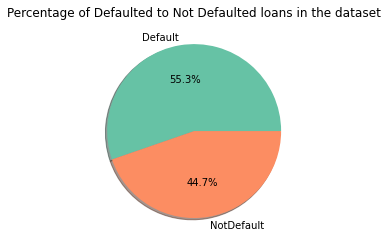

In [94]:
# Data visualization using matlibplot and seaborn libraries
# define Seaborn color palette to use
palette_color = sns.color_palette('Set2')
  
# plotting data on chart
plt.pie(df.LoanStatus.value_counts().values, labels = df.LoanStatus.value_counts().index,
        explode=[0, 0] ,colors = palette_color, autopct ='%.1f%%', shadow = True)
plt.title("Percentage of Defaulted to Not Defaulted loans in the dataset")        
  
# displaying chart
plt.show()

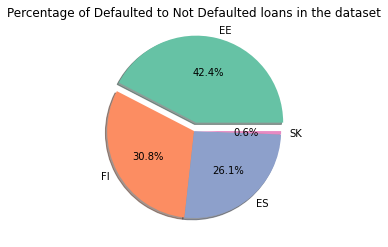

In [95]:
# Data visualization using matlibplot and seaborn libraries
# define Seaborn color palette to use
palette_color = sns.color_palette('Set2')
  
# plotting data on chart
plt.pie(df.Country[df.LoanStatus == 'Default'].value_counts().values, 
        labels = df.Country[df.LoanStatus == 'Default'].value_counts().index,
        explode=[0.1, 0, 0,0] ,colors = palette_color, autopct ='%.1f%%', shadow = True)
plt.title("Percentage of Defaulted to Not Defaulted loans in the dataset")        
  
# displaying chart
plt.show()

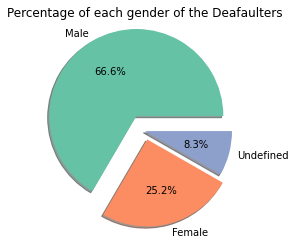

In [96]:
# Data visualization using matlibplot and seaborn libraries
# define Seaborn color palette to use
palette_color = sns.color_palette('Set2')
  
# plotting data on chart
plt.pie(df.Gender[df.LoanStatus == 'Default'].value_counts().values, 
        labels = df.Gender[df.LoanStatus == 'Default'].value_counts().index,
        explode=[0.2, 0.1, 0] ,colors = palette_color, autopct ='%.1f%%', shadow = True)
plt.title("Percentage of each gender of the Deafaulters")        
  
# displaying chart
plt.show()

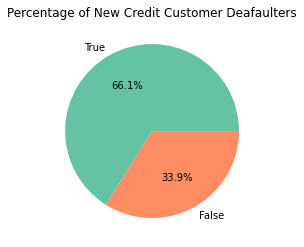

In [97]:
# Data visualization using matlibplot and seaborn libraries
# define Seaborn color palette to use
palette_color = sns.color_palette('Set2')
  
# plotting data on chart
plt.pie(df.NewCreditCustomer[df.LoanStatus == 'Default'].value_counts().values, 
        labels = df.NewCreditCustomer[df.LoanStatus == 'Default'].value_counts().index,
        explode=[0, 0] ,colors = palette_color, autopct ='%.1f%%', shadow = False)
plt.title("Percentage of New Credit Customer Deafaulters")        
  
# displaying chart
plt.show()

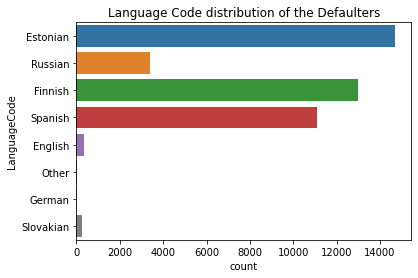

In [98]:
sns.countplot(y = df.LanguageCode[df.LoanStatus == 'Default'])
plt.title('Language Code distribution of the Defaulters');

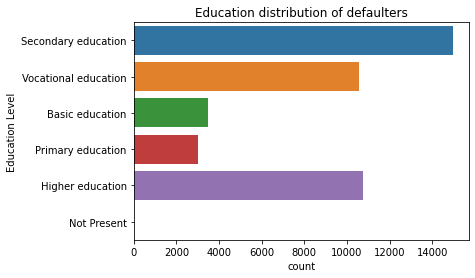

In [99]:
sns.countplot(data=df, y = df.Education[df.LoanStatus == 'Default'])
plt.title('Education distribution of defaulters')
plt.ylabel('Education Level');

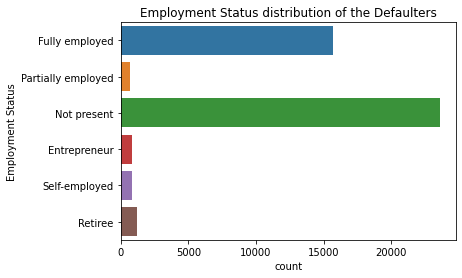

In [100]:
sns.countplot(data=df, y = df.EmploymentStatus[df.LoanStatus == 'Default'])
plt.title('Employment Status distribution of the Defaulters')
plt.ylabel('Employment Status');

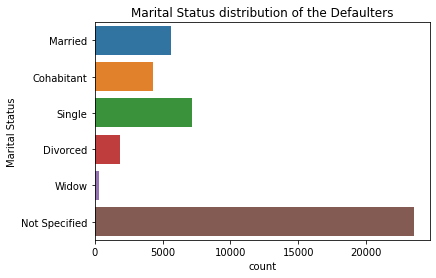

In [101]:
sns.countplot(data=df, y = df.MaritalStatus[df.LoanStatus == 'Default'])
plt.title('Marital Status distribution of the Defaulters')
plt.ylabel('Marital Status');

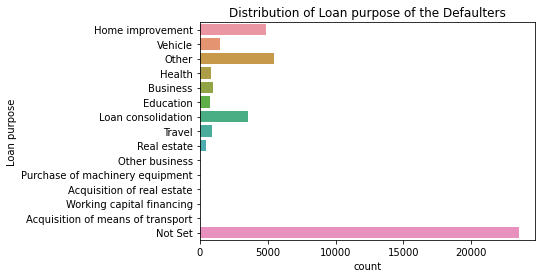

In [102]:
sns.countplot(data=df, y = df.UseOfLoan[df.LoanStatus == 'Default'])
plt.title('Distribution of Loan purpose of the Defaulters')
plt.ylabel('Loan purpose');

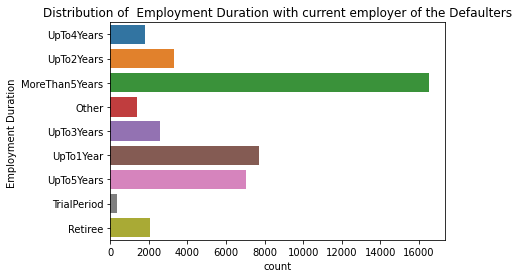

In [103]:
sns.countplot(data=df, y = df.EmploymentDurationCurrentEmployer[df.LoanStatus == 'Default'])
plt.title('Distribution of  Employment Duration with current employer of the Defaulters')
plt.ylabel('Employment Duration ');

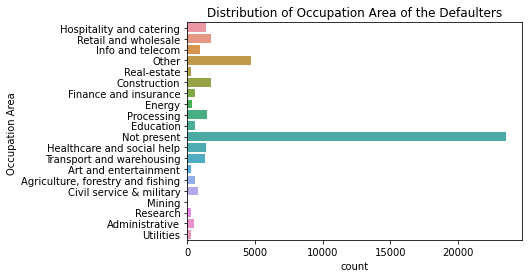

In [104]:
sns.countplot(data=df, y = df.OccupationArea[df.LoanStatus == 'Default'])
plt.title('Distribution of Occupation Area of the Defaulters')
plt.ylabel('Occupation Area ');

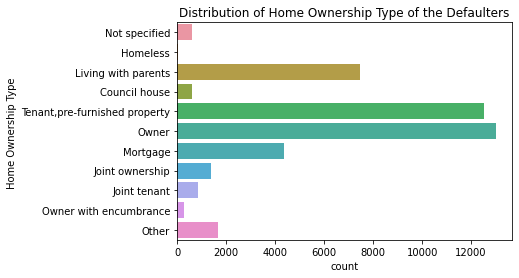

In [105]:

sns.countplot(data=df, y = df.HomeOwnershipType[df.LoanStatus == 'Default'])
plt.title('Distribution of Home Ownership Type of the Defaulters')
plt.ylabel('Home Ownership Type ');

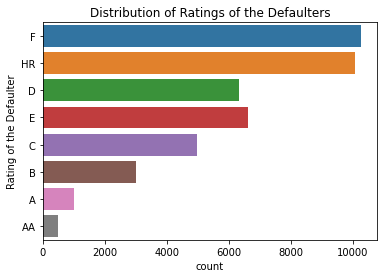

In [106]:
sns.countplot(data=df, y = df.Rating[df.LoanStatus == 'Default'])
plt.title('Distribution of Ratings of the Defaulters')
plt.ylabel('Rating of the Defaulter');

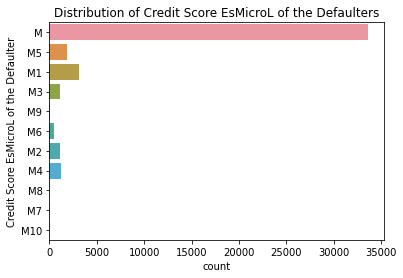

In [107]:
sns.countplot(data=df, y = df.CreditScoreEsMicroL[df.LoanStatus == 'Default'])
plt.title('Distribution of Credit Score EsMicroL of the Defaulters')
plt.ylabel('Credit Score EsMicroL of the Defaulter');

In [108]:
df.select_dtypes(float).columns

Index(['BidsManual', 'AppliedAmount', 'Amount', 'Interest', 'MonthlyPayment',
       'IncomeTotal', 'LiabilitiesTotal', 'DebtToIncome', 'FreeCash',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan'],
      dtype='object')

In [109]:
df.select_dtypes(int).columns

Index(['BidsPortfolioManager', 'BidsApi', 'Age', 'ExistingLiabilities',
       'RefinanceLiabilities', 'NoOfPreviousLoansBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'LoanTenure'],
      dtype='object')

In [110]:
df.Age[df.LoanStatus=='Default'].describe()

count    42794.000000
mean        40.128523
std         12.427852
min          0.000000
25%         30.000000
50%         39.000000
75%         49.000000
max         77.000000
Name: Age, dtype: float64

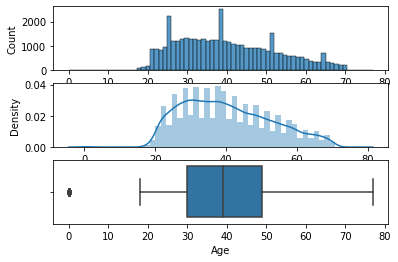

In [111]:
fig, axs = plt.subplots(nrows= 3)

sns.histplot(df.Age[df.LoanStatus=='Default'], ax=axs[0]);
sns.distplot(df.Age[df.LoanStatus=='Default'], ax=axs[1])
sns.boxplot(df.Age[df.LoanStatus=='Default'], ax=axs[2]);


In [112]:
df.MonthlyPayment.describe()

count    77394.000000
mean       130.393314
std        125.725231
min          0.000000
25%         43.070000
50%        113.040000
75%        162.107500
max       2368.540000
Name: MonthlyPayment, dtype: float64

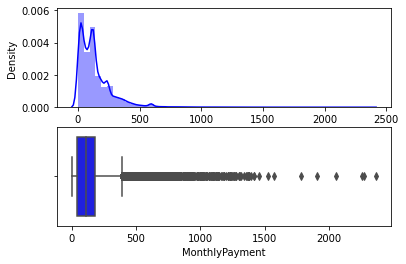

In [113]:
fig, axs = plt.subplots(nrows=2)
sns.distplot(df.MonthlyPayment[df.LoanStatus=='Default'], ax=axs[0], color='blue')
sns.boxplot(df.MonthlyPayment[df.LoanStatus=='Default'], ax=axs[1], color='blue');

In [114]:
df.Amount.describe()

count    77394.000000
mean      2472.673771
std       2163.710046
min          6.390000
25%        740.000000
50%       2020.000000
75%       3185.000000
max      10632.000000
Name: Amount, dtype: float64

In [115]:
df.AppliedAmount.describe()

count    77394.000000
mean      2746.981169
std       2463.487043
min         31.955800
25%        740.000000
50%       2125.000000
75%       3720.000000
max      10632.000000
Name: AppliedAmount, dtype: float64

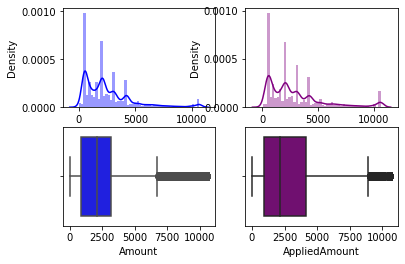

In [116]:
fig, axs = plt.subplots(nrows=2, ncols= 2)
sns.distplot(df.Amount[df.LoanStatus=='Default'], ax=axs[0,0], color='blue')
sns.boxplot(df.Amount[df.LoanStatus=='Default'], ax=axs[1,0], color='blue');

sns.distplot(df.AppliedAmount[df.LoanStatus=='Default'], ax=axs[0,1], color='purple')
sns.boxplot(df.AppliedAmount[df.LoanStatus=='Default'], ax=axs[1,1], color='purple');


In [117]:
df.PreviousRepaymentsBeforeLoan.describe()

count    77394.000000
mean       861.138387
std       1799.053621
min          0.000000
25%          0.000000
50%        366.270000
75%        861.138387
max      34077.420000
Name: PreviousRepaymentsBeforeLoan, dtype: float64

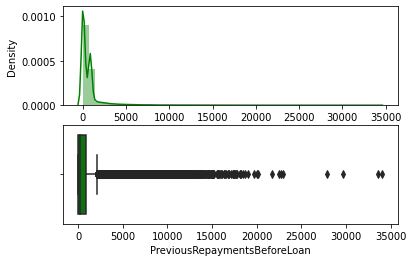

In [118]:
fig, axs = plt.subplots(nrows=2)
sns.distplot(df.PreviousRepaymentsBeforeLoan[df.LoanStatus=='Default'], ax=axs[0], color='green')
sns.boxplot(df.PreviousRepaymentsBeforeLoan[df.LoanStatus=='Default'], ax=axs[1], color='green');

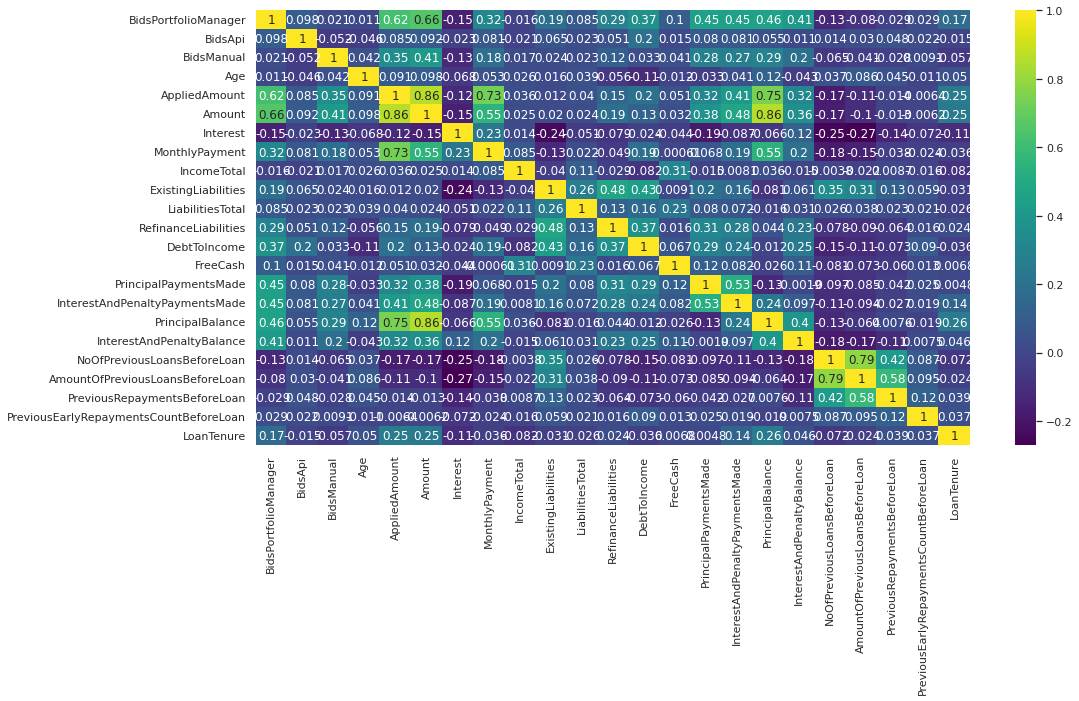

In [119]:
# Let's produce Heat Map
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df[df.LoanStatus == 'Default'].corr(), annot = True, fmt='.2g',cmap= 'viridis');

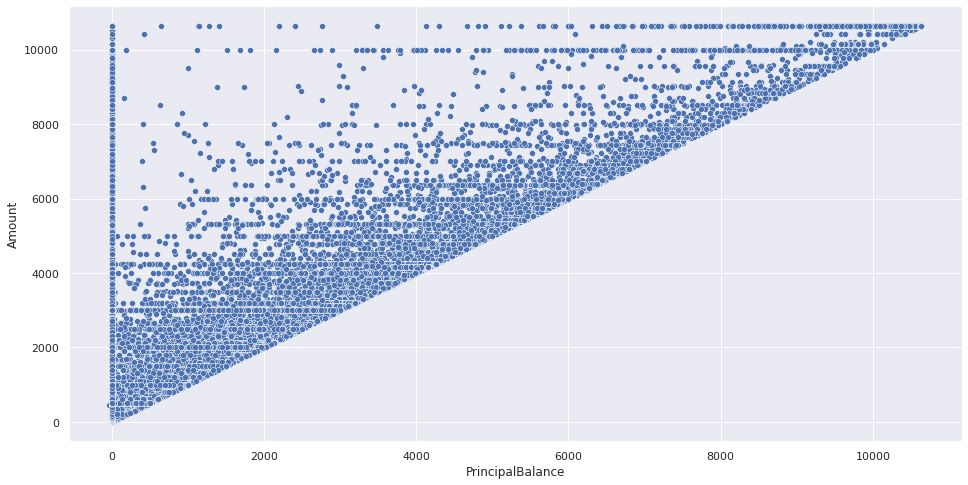

In [120]:
 # For Example : -  Amount and PriniaplBalance  
sns.scatterplot(x = df.PrincipalBalance, y = df.Amount)
plt.show();

# Feature Engineering 


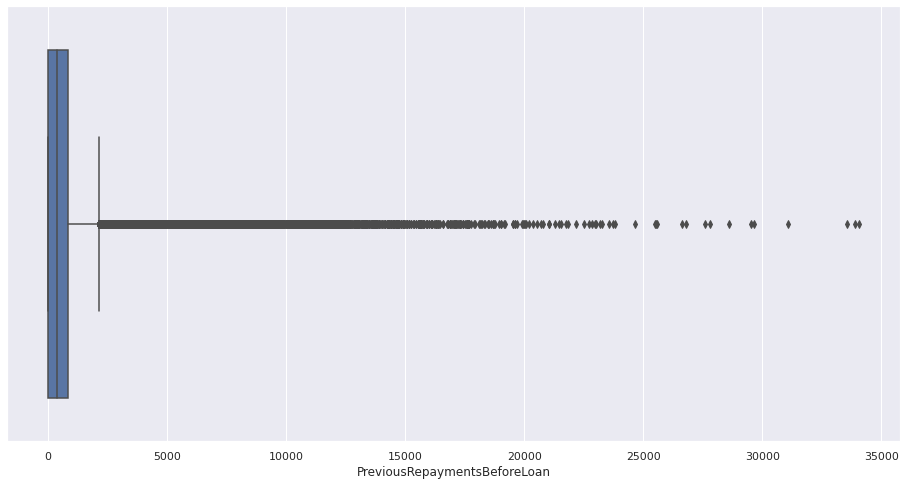

In [121]:
sns.boxplot(df.PreviousRepaymentsBeforeLoan)

In [122]:
# Let's compute IQR for each numerical feature
df_IQR = df[df.select_dtypes([float, int]).columns].quantile(.75) - df[df.select_dtypes([float, int]).columns].quantile(.25)
df_IQR 

BidsPortfolioManager                      1383.000000
BidsApi                                      5.000000
BidsManual                                 726.000000
Age                                         18.000000
AppliedAmount                             2980.000000
Amount                                    2445.000000
Interest                                    26.910000
MonthlyPayment                             119.037500
IncomeTotal                               1110.000000
ExistingLiabilities                          4.000000
LiabilitiesTotal                           622.960000
RefinanceLiabilities                         0.000000
DebtToIncome                                20.790000
FreeCash                                   269.007500
PrincipalPaymentsMade                     1389.602500
InterestAndPenaltyPaymentsMade             574.965000
PrincipalBalance                          2111.980000
InterestAndPenaltyBalance                 1083.985000
NoOfPreviousLoansBeforeLoan 

In [123]:
# Let's compute maximum and minimum limits
df_Max =  df[df.select_dtypes([float, int]).columns].quantile(.75) + (1.5*df_IQR)
df_Min =  df[df.select_dtypes([float, int]).columns].quantile(.25) - (1.5*df_IQR)
df_Max

BidsPortfolioManager                      3703.500000
BidsApi                                     12.500000
BidsManual                                1834.000000
Age                                         75.000000
AppliedAmount                             8190.000000
Amount                                    6852.500000
Interest                                    90.695000
MonthlyPayment                             340.663750
IncomeTotal                               3665.000000
ExistingLiabilities                         11.000000
LiabilitiesTotal                          1670.440000
RefinanceLiabilities                         0.000000
DebtToIncome                                51.975000
FreeCash                                   672.518750
PrincipalPaymentsMade                     3535.696250
InterestAndPenaltyPaymentsMade            1474.862500
PrincipalBalance                          5279.950000
InterestAndPenaltyBalance                 2709.962500
NoOfPreviousLoansBeforeLoan 

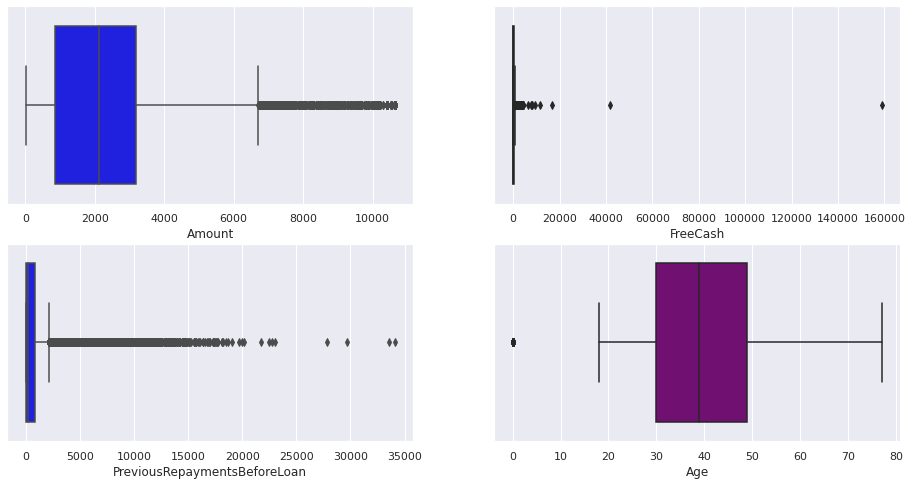

In [124]:
# #Box plots before handling outliers
fig, axs = plt.subplots(nrows=2, ncols= 2)
sns.boxplot(df.Amount[df.LoanStatus=='Default'], ax=axs[0,0], color='blue')
sns.boxplot(df.PreviousRepaymentsBeforeLoan[df.LoanStatus=='Default'], ax=axs[1,0], color='blue');

sns.boxplot(df.FreeCash[df.LoanStatus=='Default'], ax=axs[0,1], color='purple')
sns.boxplot(df.Age[df.LoanStatus=='Default'], ax=axs[1,1], color='purple');

In [125]:
df.select_dtypes([float, int]).columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'Age', 'AppliedAmount',
       'Amount', 'Interest', 'MonthlyPayment', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'LoanTenure'],
      dtype='object')

In [126]:
col_IQR = df['Age'].quantile(.75) - df['Age'].quantile(.25)
col_Max =  df['Age'].quantile(.75) + (1.5*col_IQR)
col_Max

75.0

In [127]:
# Loop for replacing outliers above upper bound with the upper bound value:
for column in df.select_dtypes([float, int]).columns :
   
    col_IQR = df[column].quantile(.75) - df[column].quantile(.25)
    col_Max =  df[column].quantile(.75) + (1.5*col_IQR)
    df[column][df[column] > col_Max] =  col_Max

In [128]:
# Loop for replacing outliers under lower bound with the lower bound value:
for column in df.select_dtypes([float, int]).columns :
    col_IQR = df[column].quantile(.75) - df[column].quantile(.25)
    col_Min =  df[column].quantile(.25) - (1.5*col_IQR)
    df[column][df[column] < col_Min] =  col_Min

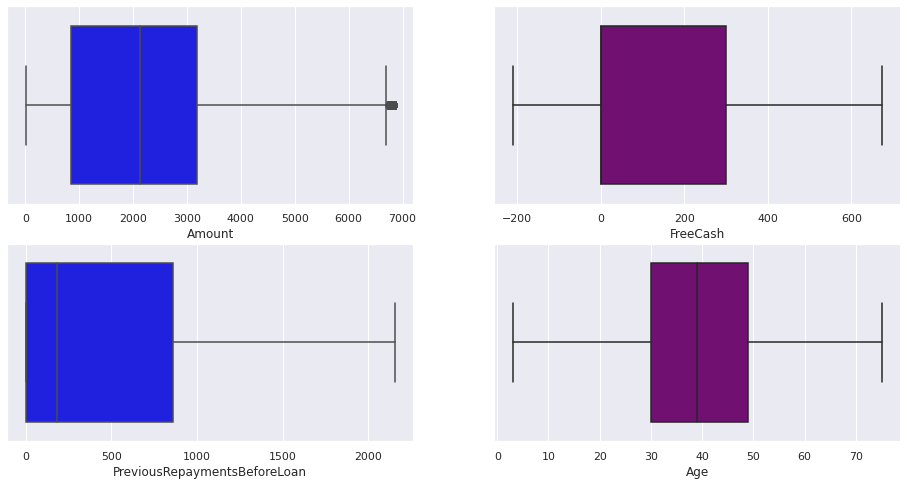

In [129]:
# # Check, boxplot after handling outliers:
fig, axs = plt.subplots(nrows=2, ncols= 2)
sns.boxplot(df.Amount[df.LoanStatus=='Default'], ax=axs[0,0], color='blue')
sns.boxplot(df.PreviousRepaymentsBeforeLoan[df.LoanStatus=='Default'], ax=axs[1,0], color='blue');

sns.boxplot(df.FreeCash[df.LoanStatus=='Default'], ax=axs[0,1], color='purple')
sns.boxplot(df.Age[df.LoanStatus=='Default'], ax=axs[1,1], color='purple');


In [130]:
df.columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'VerificationType', 'LanguageCode', 'Age', 'Gender', 'Country',
       'AppliedAmount', 'Amount', 'Interest', 'MonthlyPayment', 'UseOfLoan',
       'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'Rating', 'Restructured', 'CreditScoreEsMicroL',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'LoanStatus', 'LoanTenure'],
      dtype='object')

In [131]:
# saving the dataframe
# df.to_csv('final_kk_data.csv')

The **EMI** is calculated based on the following mathematical formula

# **EMI = P × r × (1 + r) ^ n / ((1 + r) ^ n – 1)**
Where,

P = Loan amount. **"Amount"**

r = Rate of interest, which is calculated on a monthly basis. **"Interest"**

n = Loan tenure (in months). **"LoanTenure"**

Loan tenure is the amount of time you are given to Repay your Loan in Months.
And we need to convert the annual rate of interest into monthly basis by Dividing it by 12. (monthly rate of interest)


In [132]:
print(df.shape)
df['Amount'].head()

(77394, 39)


0    115.0408
1    140.6057
2    319.5409
3     57.5205
4    319.5436
Name: Amount, dtype: float64

In [133]:
loan_data_temp1 = df[[ 'Amount', 'Interest','LoanTenure']]
loan_data_temp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77394 entries, 0 to 134528
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Amount      77394 non-null  float64
 1   Interest    77394 non-null  float64
 2   LoanTenure  77394 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 2.4 MB


In [134]:
 # del[[loan_data_temp1]]

In [135]:
loan_data_temp1.isnull().sum()

Amount        0
Interest      0
LoanTenure    0
dtype: int64

In [136]:
def emi_cal(p, r, n):
  r = ((r /12)/100)
  emi = np.round((p * r * pow(1 + r, n)) / (pow(1 + r, n) - 1))
  return emi  

In [137]:
loan_data_temp1['EMI'] = emi_cal(loan_data_temp1['Amount'], loan_data_temp1['Interest'], loan_data_temp1['LoanTenure'])
loan_data_temp1['tot_pay_back__amt']= loan_data_temp1['EMI'] * loan_data_temp1['LoanTenure']

In [138]:
df['EMI'] = loan_data_temp1['EMI']

In [139]:
loan_data_temp1.head(20)

,Amount,Interest,LoanTenure,EMI,tot_pay_back__amt
0,115.0408,30.0,12,11.0,132.0
1,140.6057,25.0,1,144.0,144.0
2,319.5409,25.0,20,20.0,400.0
3,57.5205,45.0,15,5.0,75.0
4,319.5436,30.0,12,31.0,372.0
5,300.4314,30.0,25,16.0,400.0
6,191.7445,32.0,21,12.0,252.0
7,31.9518,20.0,7,5.0,35.0
8,31.9498,20.0,13,3.0,39.0
9,319.5583,25.0,13,28.0,364.0


In [140]:
# random index value 
loan_data_temp1.iloc[5637,:]

Amount               2000.00
Interest               22.69
LoanTenure             36.00
EMI                    77.00
tot_pay_back__amt    2772.00
Name: 6021, dtype: float64

# **Eligible Loan Amount** 

# **ELA = Assets (Income) - Liabilities of the borrower**

Assets:
FreeCash = ELA

# **TotalIncome - LiabilitiesTotal = ELA**

Let's Check both of them out in the data.

Under Consideration

Eligible Loan Amount means, with respect to a Mortgage Loan that is an Eligible Loan, the lesser of:

(i) the Principal Balance of such Eligible Loan, AppliedAmount

(ii) the Market Value of such Eligible Loan **PurchasePrice | BidPrinciple**

My Approach

Calculate

**TotalInterestOnAppliedAmount= [AppliedAmount x Interest x LoanDuration (in Years)] /100**


 **AppliedAmount + TotalInterestOnAppliedAmount = TotalAmountToBePaid**

Then Divide on the loan tenure (months)

If the result is less than (TotalIncome- LiabilitiesTotal)*30/100

Then allow the Applied Amount, If not allow only the result of the previous calculation.

In [141]:
loan_data_temp2 = df[['AppliedAmount', 'Interest', 'IncomeTotal', 'LiabilitiesTotal', 'LoanTenure']]
loan_data_temp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77394 entries, 0 to 134528
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AppliedAmount     77394 non-null  float64
 1   Interest          77394 non-null  float64
 2   IncomeTotal       77394 non-null  float64
 3   LiabilitiesTotal  77394 non-null  float64
 4   LoanTenure        77394 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 3.5 MB


In [142]:
# del[[loan_data_temp2]]

In [143]:
def avlb_incm(inc,lia):
  avlb_incm = np.round((inc-lia)*0.3)
  return avlb_incm

def tot_amt_pay(app_amt, r,n):
  amt_pay_month = np.round((app_amt+(app_amt * (r/100) * (n/12))) / n)
  return amt_pay_month



**We will be comparing on the Monthly Basis**

In [144]:
# Step 1
loan_data_temp2['Avlb_Incm_Monthly'] = avlb_incm (loan_data_temp2['IncomeTotal'],loan_data_temp2['LiabilitiesTotal'])
loan_data_temp2['Amt_pay_Monthly'] = tot_amt_pay(loan_data_temp2['AppliedAmount'],loan_data_temp2['Interest'],loan_data_temp2['LoanTenure'])
loan_data_temp2.head()

,AppliedAmount,Interest,IncomeTotal,LiabilitiesTotal,LoanTenure,Avlb_Incm_Monthly,Amt_pay_Monthly
0,319.5582,30.0,3665.0,0.0,12,1100.0,35.0
1,191.7349,25.0,3665.0,0.0,1,1100.0,196.0
2,319.5582,25.0,3665.0,0.0,20,1100.0,23.0
3,127.8233,45.0,3665.0,0.0,15,1100.0,13.0
4,319.5582,30.0,3665.0,0.0,12,1100.0,35.0


In [145]:
def ela(df):
  avlb_incm = df['Avlb_Incm_Monthly'].values
  tot_amt_pay= df['Amt_pay_Monthly'].values 
  n = df['LoanTenure'].values
  ELA = np.empty(0)
  for i in range(len(avlb_incm)):
    if tot_amt_pay[i] <= avlb_incm[i]:
      ELA = np.append(ELA, (tot_amt_pay[i] * n[i]))
    else:
      ELA = np.append(ELA, (avlb_incm[i] * n[i]))  
  return ELA

In [146]:
loan_data_temp2['ELA'] = ela(loan_data_temp2)
loan_data_temp2.head(10)

,AppliedAmount,Interest,IncomeTotal,LiabilitiesTotal,LoanTenure,Avlb_Incm_Monthly,Amt_pay_Monthly,ELA
0,319.5582,30.0,3665.0,0.0,12,1100.0,35.0,420.0
1,191.7349,25.0,3665.0,0.0,1,1100.0,196.0,196.0
2,319.5582,25.0,3665.0,0.0,20,1100.0,23.0,460.0
3,127.8233,45.0,3665.0,0.0,15,1100.0,13.0,195.0
4,319.5582,30.0,3665.0,0.0,12,1100.0,35.0,420.0
5,300.3847,30.0,3665.0,0.0,25,1100.0,20.0,500.0
6,191.7349,32.0,3665.0,0.0,21,1100.0,14.0,294.0
7,191.7349,20.0,3665.0,0.0,7,1100.0,31.0,217.0
8,178.9526,20.0,3665.0,0.0,13,1100.0,17.0,221.0
9,319.5582,25.0,3665.0,0.0,13,1100.0,31.0,403.0


In [147]:
loan_data_temp2.iloc[14839,:]

AppliedAmount        1060.00
Interest               62.56
IncomeTotal          2039.00
LiabilitiesTotal     1670.44
LoanTenure             37.00
Avlb_Incm_Monthly     111.00
Amt_pay_Monthly        84.00
ELA                  3108.00
Name: 16310, dtype: float64

In [148]:
# random index value 
loan_data_temp2.iloc[37839,:]

AppliedAmount        1590.00
Interest               12.68
IncomeTotal          2000.00
LiabilitiesTotal      172.00
LoanTenure             13.00
Avlb_Incm_Monthly     548.00
Amt_pay_Monthly       139.00
ELA                  1807.00
Name: 45140, dtype: float64

In [149]:
# random index value 
loan_data_temp2.iloc[12839,:]

AppliedAmount        3185.00
Interest               58.57
IncomeTotal           850.00
LiabilitiesTotal      802.00
LoanTenure             36.00
Avlb_Incm_Monthly      14.00
Amt_pay_Monthly       244.00
ELA                   504.00
Name: 14126, dtype: float64

In [150]:
df['ELA'] = loan_data_temp2['ELA']
df.columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'VerificationType', 'LanguageCode', 'Age', 'Gender', 'Country',
       'AppliedAmount', 'Amount', 'Interest', 'MonthlyPayment', 'UseOfLoan',
       'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'Rating', 'Restructured', 'CreditScoreEsMicroL',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'LoanStatus', 'LoanTenure',
       'EMI', 'ELA'],
      dtype='object')

## **Preferred ROI (Return On Investment) in %**
We weren't able to determine the procedure of handling Risk related to loan in order to determine Preferred **ROI in Percentage** value.

In order to complete the task in hand and complete it, we'll calculate ROI instead.

ROI = (Net Return on Investment / Cost of Investment ) x 100

ROI = (interest on lended amount/ Lended Amount) x 100

In [151]:
loan_data_temp3=df[['Amount','AppliedAmount','Interest','LoanTenure','IncomeTotal','DebtToIncome']]
loan_data_temp3.head()

,Amount,AppliedAmount,Interest,LoanTenure,IncomeTotal,DebtToIncome
0,115.0408,319.5582,30.0,12,3665.0,0.0
1,140.6057,191.7349,25.0,1,3665.0,0.0
2,319.5409,319.5582,25.0,20,3665.0,0.0
3,57.5205,127.8233,45.0,15,3665.0,0.0
4,319.5436,319.5582,30.0,12,3665.0,0.0


In [152]:
loan_data_temp3['InterestAmount'] = (loan_data_temp3['Amount']*(loan_data_temp3['Interest']/100)*(loan_data_temp3['LoanTenure']/12))
loan_data_temp3['TotalAmount'] = (loan_data_temp3['InterestAmount'] + loan_data_temp3['Amount'])
loan_data_temp3['ROI'] = (loan_data_temp3['InterestAmount'] / loan_data_temp3['Amount'])*100
df['ROI'] = loan_data_temp3['ROI']

In [153]:
def proi(df):
    df['PROI'] = df['ROI'].median()      # Setting PROI

    for i in range(df.shape[0]):
        # Check out LoanTenure
        if df['LoanTenure'].loc[i] <= 19:
            df['PROI'].loc[i] = df['PROI'].loc[i] - 5
        elif df['LoanTenure'].loc[i] > 25:
            df['PROI'].loc[i] = df['PROI'].loc[i] + 5
        
        # Check out AppliedAmount
        if (df['AppliedAmount'].loc[i] <= 1175) & (df['AppliedAmount'].loc[i] >= 850):
            df['PROI'].loc[i] = df['PROI'].loc[i] - 5
        elif df['AppliedAmount'].loc[i] > 2000:
            df['PROI'].loc[i] = df['PROI'].loc[i] + 5

        # Check out IncomeTotal
        if df['IncomeTotal'].loc[i] <= 1000:
            df['PROI'].loc[i] = df['PROI'].loc[i] - 5

        # Check out DebtToIncome
        if df['DebtToIncome'].loc[i] == 0:
            df['PROI'].loc[i] = df['PROI'].loc[i] - 5
        else:
            df['PROI'].loc[i] = df['PROI'].loc[i] + 5

    return df['PROI']

In [ ]:
loan_data_temp3['PROI'] = proi(loan_data_temp3)

In [155]:
df['PROI'] = loan_data_temp3['PROI']

In [156]:
df.columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'VerificationType', 'LanguageCode', 'Age', 'Gender', 'Country',
       'AppliedAmount', 'Amount', 'Interest', 'MonthlyPayment', 'UseOfLoan',
       'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'Rating', 'Restructured', 'CreditScoreEsMicroL',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'LoanStatus', 'LoanTenure',
       'EMI', 'ELA', 'ROI', 'PROI'],
      dtype='object')

In [161]:
df.shape

(77394, 43)

In [162]:
loan_data_temp3.head(10)

,Amount,AppliedAmount,Interest,LoanTenure,IncomeTotal,DebtToIncome,InterestAmount,TotalAmount,ROI,PROI
0,115.0408,319.5582,30.0,12,3665.0,0.0,34.512240,149.553040,30.000000,110.991667
1,140.6057,191.7349,25.0,1,3665.0,0.0,2.929285,143.534985,2.083333,110.991667
2,319.5409,319.5582,25.0,20,3665.0,0.0,133.142042,452.682942,41.666667,115.991667
3,57.5205,127.8233,45.0,15,3665.0,0.0,32.355281,89.875781,56.250000,110.991667
4,319.5436,319.5582,30.0,12,3665.0,0.0,95.863080,415.406680,30.000000,110.991667
5,300.4314,300.3847,30.0,25,3665.0,0.0,187.769625,488.201025,62.500000,115.991667
6,191.7445,191.7349,32.0,21,3665.0,0.0,107.376920,299.121420,56.000000,115.991667
7,31.9518,191.7349,20.0,7,3665.0,0.0,3.727710,35.679510,11.666667,110.991667
8,31.9498,178.9526,20.0,13,3665.0,0.0,6.922457,38.872257,21.666667,110.991667
9,319.5583,319.5582,25.0,13,3665.0,0.0,86.547040,406.105340,27.083333,110.991667


In [ ]:
#del[[loan_data_temp3]]

In [163]:
# df.drop(columns=['ROI'], inplace = True)

In [164]:
#loan_data_temp1.drop(columns=['EMI'], inplace = True)

In [160]:
#df.drop(columns=['EMI'], inplace = True)

In [161]:
#loan_data_temp3.head(20)

In [159]:
# random index value 
loan_data_temp3.iloc[5637,:]

Amount            2000.000000
AppliedAmount     2000.000000
Interest            22.690000
LoanTenure          36.000000
IncomeTotal       1880.000000
DebtToIncome         7.650000
InterestAmount    1361.400000
TotalAmount       3361.400000
ROI                 68.070000
PROI               120.991667
Name: 6021, dtype: float64

# **Feature Selection**

In [160]:
# A function to select highly correlated features.
def Correlation(dataset, threshold): 
    correltated_features = set() # as a container of highly correlated features
    correlation_matrix = dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                column_name = correlation_matrix.columns[i]
                correltated_features.add(column_name)
    return correltated_features

In [163]:
# let's selected features with a correlation factor > 0.8
Correlation(df, 0.8)

{'Amount', 'AmountOfPreviousLoansBeforeLoan', 'ROI'}

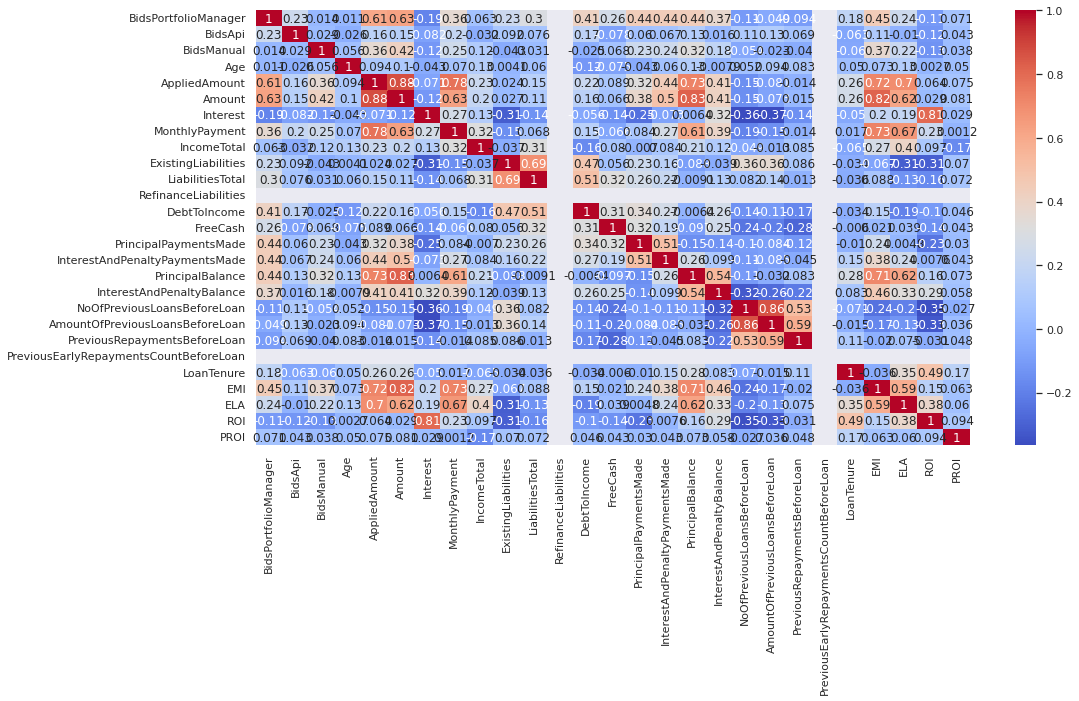

In [164]:
#  Let's produce Heat Map
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df[df.LoanStatus == 'Default'].corr(), annot = True, fmt='.2g',cmap= 'coolwarm');

In [165]:
df.columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'VerificationType', 'LanguageCode', 'Age', 'Gender', 'Country',
       'AppliedAmount', 'Amount', 'Interest', 'MonthlyPayment', 'UseOfLoan',
       'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'Rating', 'Restructured', 'CreditScoreEsMicroL',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'LoanStatus', 'LoanTenure',
       'EMI', 'ELA', 'ROI', 'PROI'],
      dtype='object')

**Imputing both the Categorical and Numerical Features having Missing Values.**

In [166]:
#Categorical Features in Dataset 
catg_features = [col_name for col_name in df.columns if df[col_name].dtype == 'O']
print("Number of Categorical Features:",format(len(catg_features )))
print("Categorical Features: {}",catg_features )

Number of Categorical Features: 16
Categorical Features: {} ['NewCreditCustomer', 'VerificationType', 'LanguageCode', 'Gender', 'Country', 'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus', 'EmploymentDurationCurrentEmployer', 'OccupationArea', 'HomeOwnershipType', 'Rating', 'Restructured', 'CreditScoreEsMicroL', 'LoanStatus']


In [167]:
#Imputing the missing values in categorical features using the most frequent value which is mode
catg_features_with_null = [feature for feature in catg_features if df[feature].isnull().sum()]
for each_feature in catg_features_with_null:
  mode_val = df[each_feature].mode()[0]
  df[each_feature].fillna(mode_val,inplace=True)

In [168]:
#Numerical Features in Dataset
num_features = [col_name for col_name in df.columns if df[col_name].dtype != 'O']
print("Number of Numerical Features: ",format(len(num_features)))
print("Numerical Features: {}",num_features)

Number of Numerical Features:  27
Numerical Features: {} ['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'Age', 'AppliedAmount', 'Amount', 'Interest', 'MonthlyPayment', 'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash', 'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade', 'PrincipalBalance', 'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan', 'PreviousEarlyRepaymentsCountBeforeLoan', 'LoanTenure', 'EMI', 'ELA', 'ROI', 'PROI']


In [169]:
#Impute missing values in numerical features using mean
num_features_with_null = [feature for feature in num_features if df[feature].isnull().sum()]
for feature in num_features_with_null:
   mean_value = df[feature].mean()
   df[feature].fillna(mean_value,inplace=True)

# **Feature Encoding**

In [170]:
# Let's perform categorical features encoding:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [171]:
# Ind_features Encoding
for feature in df.select_dtypes([object, bool]).columns:
    df[feature]= LE.fit_transform(df[feature])

In [172]:
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,LoanStatus,LoanTenure,EMI,ELA,ROI,PROI
0,0.0,0.0,115.0410,1,2,1,61,0,0,319.5582,115.0408,30.0,130.393314,10,5,2,1,6,17,6,3665.0,0,0.0,0,0.0,0.0,6,0,0,115.0408,20.4222,0.00,0.00,1.0,83.0852,0.0000,0,1,12,11.0,420.0,30.000000,110.991667
1,0.0,0.0,140.6057,0,2,1,48,0,0,191.7349,140.6057,25.0,130.393314,10,1,1,1,0,5,6,3665.0,0,0.0,0,0.0,0.0,6,0,0,140.6057,2.0227,0.00,0.00,2.0,255.6467,258.6256,0,1,1,144.0,196.0,2.083333,110.991667
2,0.0,0.0,319.5580,1,2,1,58,0,0,319.5582,319.5409,25.0,130.393314,7,4,2,1,7,9,6,3665.0,0,0.0,0,0.0,0.0,6,1,0,203.1909,59.7626,116.35,414.07,0.0,0.0000,0.0000,0,0,20,20.0,460.0,41.666667,115.991667
3,0.0,0.0,57.5205,1,2,1,23,0,0,127.8233,57.5205,45.0,130.393314,8,0,4,2,5,13,6,3665.0,0,0.0,0,0.0,0.0,6,0,0,57.5205,18.7323,0.00,0.00,1.0,134.2144,0.0000,0,1,15,5.0,195.0,56.250000,110.991667
4,0.0,0.0,319.5582,1,2,1,25,0,0,319.5582,319.5436,30.0,130.393314,15,4,0,1,5,17,6,3665.0,0,0.0,0,0.0,0.0,6,0,0,319.5436,220.4200,0.00,0.00,1.0,146.9966,0.0000,0,0,12,31.0,420.0,30.000000,110.991667


In [173]:
df.dtypes

BidsPortfolioManager                      float64
BidsApi                                   float64
BidsManual                                float64
NewCreditCustomer                           int64
VerificationType                            int64
LanguageCode                                int64
Age                                         int64
Gender                                      int64
Country                                     int64
AppliedAmount                             float64
Amount                                    float64
Interest                                  float64
MonthlyPayment                            float64
UseOfLoan                                   int64
Education                                   int64
MaritalStatus                               int64
EmploymentStatus                            int64
EmploymentDurationCurrentEmployer           int64
OccupationArea                              int64
HomeOwnershipType                           int64


In [174]:
df= df.drop(columns=['Amount','PreviousEarlyRepaymentsCountBeforeLoan','NoOfPreviousLoansBeforeLoan','LoanTenure','ROI',
                     'LiabilitiesTotal','PrincipalBalance','InterestAndPenaltyBalance','AmountOfPreviousLoansBeforeLoan'])

df.shape

(77394, 34)

In [200]:
df = df[np.isfinite(df).all(1)]

# **Feature Scaling**

In [224]:
from sklearn.preprocessing import StandardScaler 

In [227]:
X = df.drop(['EMI', 'ELA', 'PROI','LoanStatus'], axis=1)
y1 = df[['LoanStatus']]
y2 = df[['EMI', 'ELA', 'PROI']]

In [228]:
Scaler = StandardScaler()

In [229]:
X = Scaler.fit_transform(X)

In [230]:
X

array([[-0.98793194, -0.63461629, -0.67019477, ..., -0.71429192,
        -0.80570238, -0.8732899 ],
       [-0.98793194, -0.63461629, -0.62473234, ..., -0.69155885,
        -0.84438782, -0.48538744],
       [-0.98793194, -0.63461629, -0.30649642, ..., -0.63590623,
        -0.72298813, -0.8732899 ],
       ...,
       [ 0.80072029, -0.63461629,  0.05884688, ...,  0.84605645,
        -0.42954392, -0.8732899 ],
       [ 0.67845798, -0.63461629,  1.18808528, ...,  1.19088192,
         0.33199132, -0.72810336],
       [ 1.71995168, -0.63461629, -0.85699214, ...,  0.49405488,
         0.58782679, -0.50936362]])

In [231]:
y1 

,LoanStatus
0,1
1,1
2,0
3,1
4,0
...,...
134524,0
134525,1
134526,0
134527,0


In [232]:
y2 = Scaler.fit_transform(y2)

In [233]:
y2

array([[ -1.12099506,  -0.87458798, -13.34726043],
       [  0.45247002,  -0.91313216, -13.34726043],
       [ -1.01451998,  -0.86770509,  -6.6348608 ],
       ...,
       [ -0.38750006,   0.0293076 ,   0.07753883],
       [ -0.36383893,  -1.55564997,   0.07753883],
       [ -0.10356651,  -1.04132599,   0.07753883]])

In [184]:
# saving the dataframe
# df.to_csv('final_kk_data.csv')

# **Spiliting data into training and testing sets**

In [ ]:
# X=pd.DataFrame(X)

In [ ]:
# result_df=pd.DataFrame(np.hstack((X,y[:, None])))
# print(result_df.shape)
# result_df.head(20)

In [ ]:
# save the final data
# result_df.to_csv('Final_Data_to_model.csv',index=False)

In [234]:
# Let's use Train Test Split 
from sklearn.model_selection import train_test_split

In [235]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=0, test_size = .80)

In [236]:
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, random_state=0, test_size = .80)

In [237]:
X_train.shape, y1_train.shape, y2_train.shape

((15478, 30), (15478, 1), (15478, 3))

In [238]:
X_test.shape, y1_test.shape, y2_test.shape 

((61914, 30), (61914, 1), (61914, 3))

# **SVM Support Vector Classification**

In [239]:
from sklearn.svm import SVC

**SVC with Kernel Gaussian (Radial Basis Function)**

In [247]:
svc_classifier = SVC(kernel='rbf')
svc_classifier.fit(X_train, y1_train)
svc_classifier.score(X_test, y1_test)

0.8260167328875537

**SVC with Kernel Linear**

In [248]:
classification_linear = SVC(kernel='linear')
classification_linear.fit(X_train, y1_train)
classification_linear.score(X_test, y1_test)

0.7917110831152889

# **Linear Regression**

In [254]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y2_train)

y_pred_lin = lin_reg.predict(X_test)

In [255]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# model evaluation
print('Model Evaluation:')
print('mean_squared_error : ', mean_squared_error(y2_test, y_pred_lin))
print('mean_squared_percentage_error : ', mean_absolute_percentage_error(y2_test, y_pred_lin, multioutput=[0.3, 0.5, 0.7]))
print('R2_score : ', r2_score(y2_test, y_pred_lin))

Model Evaluation:
mean_squared_error :  0.48276552986556825
mean_squared_percentage_error :  2.2798529193205477
R2_score :  0.5229898102071444


# **LassoRegression L1 Norm**

**Base Model**

In [256]:
from sklearn.linear_model import Lasso

las_reg = Lasso()

las_reg.fit(X_train, y2_train)

y_pred_base = las_reg.predict(X_test)

In [257]:
# model evaluation
print('Ridge Regression - Base Model:')
print('mean_squared_error : ', mean_squared_error(y2_test, y_pred_base))
print('mean_squared_percentage_error : ', mean_absolute_percentage_error(y2_test, y_pred_base, multioutput=[0.3, 0.5, 0.7]))
print('R2_score : ', r2_score(y2_test, y_pred_base))

Ridge Regression - Base Model:
mean_squared_error :  1.00944311162569
mean_squared_percentage_error :  0.9790674644729185
R2_score :  -0.00011080126232698717


**Hyperparameter Tunning**

In [258]:
# Defining a Random Forest Classifier using Hyperparameter tunning
from sklearn.model_selection import RandomizedSearchCV

las_reg = Lasso()

param_dist = {"alpha": list(np.array(range(1,9))*0.25),
              "normalize": [True, False]}

random_search = RandomizedSearchCV(las_reg, param_distributions=param_dist)

random_search.fit(X_train, y2_train)

las_preds = random_search.best_estimator_.predict(X_test)

In [259]:
# model evaluation
print('Ridge Regression - Best estimator:')
print('Best Estimator: \n', random_search.best_estimator_)
print('mean_squared_error : ', mean_squared_error(y2_test, las_preds))
print('mean_squared_percentage_error : ', mean_absolute_percentage_error(y2_test, las_preds, multioutput=[0.3,0.5, 0.7]))
print('R2_score : ', r2_score(y2_test, las_preds))

Ridge Regression - Best estimator:
Best Estimator: 
 Lasso(alpha=0.25, normalize=False)
mean_squared_error :  0.6577262261549297
mean_squared_percentage_error :  1.1508963219628245
R2_score :  0.3494033483558512


# **RidgeRegression L2 Norm**

**Base Model**

In [264]:
from sklearn.linear_model import Ridge

rid_reg = Ridge()

rid_reg.fit(X_train, y2_train)

y_pred_base = rid_reg.predict(X_test)

In [261]:
# model evaluation

print('Ridge Regression - Base Model:')
print('mean_squared_error : ', mean_squared_error(y2_test, y_pred_base))
print('mean_squared_percentage_error : ', mean_absolute_percentage_error(y2_test, y_pred_base, multioutput=[0.3, 0.5, 0.7]))
print('R2_score : ', r2_score(y2_test, y_pred_base))

Ridge Regression - Base Model:
mean_squared_error :  0.48276610753176746
mean_squared_percentage_error :  2.279663468779816
R2_score :  0.5229892441652612


**Hyperparameter Tunning**

In [262]:
# Defining a Random Forest Classifier using Hyperparameter tunning

from sklearn.model_selection import RandomizedSearchCV

rid_reg = Ridge()

param_dist = {"alpha": list(np.array(range(1,9))*0.25),
              "normalize": [True, False]}

random_search = RandomizedSearchCV(rid_reg, param_distributions=param_dist)

random_search.fit(X_train, y2_train)

rid_preds = random_search.best_estimator_.predict(X_test)

In [263]:
# model evaluation

print('Ridge Regression - Best estimator:')
print('Best Estimator: \n', random_search.best_estimator_)
print('mean_squared_error : ', mean_squared_error(y2_test, rid_preds))
print('mean_squared_percentage_error : ', mean_absolute_percentage_error(y2_test, rid_preds, multioutput=[0.3,0.5, 0.7]))
print('R2_score : ', r2_score(y2_test, rid_preds))

Ridge Regression - Best estimator:
Best Estimator: 
 Ridge(alpha=2.0, normalize=False)
mean_squared_error :  0.48276669847169984
mean_squared_percentage_error :  2.2794741360535777
R2_score :  0.5229886649175045
